In [1]:
import pandas as pd

In [2]:
landslide = pd.read_csv("landslide_data_original.csv")

In [3]:
landslide

,dates,stationid,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
0,08-07-2018,t10,25.46875,82.18750,1036.346875,6.75,5.5000,4000,0.0000
1,09-07-2018,t10,26.19298,83.14912,1037.604386,1761.75,11.8448,4000,5.6930
2,10-07-2018,t10,25.17021,85.34043,1037.889362,652.50,8.7692,4000,6.8511
3,11-07-2018,t10,24.29851,87.68657,1036.857463,963.00,8.8358,4000,6.0373
4,12-07-2018,t10,24.06923,87.64615,1027.830769,254.25,274.6232,4333,31.2385
...,...,...,...,...,...,...,...,...,...
940,21-11-2018,t9,16.65926,58.69630,1026.797407,73577.25,5521.1231,47460,54.4222
941,22-11-2018,t9,15.52482,63.16312,1027.495248,65301.75,5521.1231,47460,54.5674
942,23-11-2018,t9,15.81560,59.21277,1029.318511,73534.50,5521.1231,47460,54.8794
943,24-11-2018,t9,16.58571,54.63571,1026.776357,72283.50,5521.1231,47460,55.0286


In [4]:
def Temp():
    temp_arr = landslide['temperature'].to_numpy()
    length = len(temp_arr)
    
    # Mean
    mean = 0;
    for i in temp_arr:
        mean+=i
    mean /= length

    # Min
    min = temp_arr[0]
    for i in temp_arr:
        if min > i:
            min = i
    
    # Max
    max = temp_arr[0]
    for i in temp_arr:
        if max < i:
            max = i
    
    # Median
    temp_arr.sort()
    if length%2:
        med = temp_arr[int(length/2)]
    else:
        med = (temp_arr[length/2-1] + temp_arr[length/2])/2

    # Std
    std = 0
    for i in temp_arr:
        std+=(i-mean)**2
    std /= length
    std = std**0.5

    return mean, min, max, med, std

In [5]:
mean, mininmun, maximum, median, stdv = Temp()
print(f"The statistical measures of Temperature attribute are: \nMean = {mean:.2f} \nMaximum = {maximum:.2f} \nMinimum = {mininmun:.2f} \nMedian = {median:.2f} \nSTD = {stdv:.2f}")

The statistical measures of Temperature attribute are: 
Mean = 21.21 
Maximum = 31.38 
Minimum = 7.67 
Median = 22.27 
STD = 4.35


In [6]:
import numpy as np
# landslide.index = np.arange(0,1889,2)
# landslide

## Question 2

In [7]:
landslide.columns

Index(['dates', 'stationid', 'temperature', 'humidity', 'pressure', 'rain',
       'lightavg', 'lightmax', 'moisture'],
      dtype='object')

In [8]:
landslide_new = landslide.drop(labels=["dates", "stationid"], axis=1)
landslide_new = landslide_new[:len(landslide_new.columns)]
# landslide_new.index = landslide_new.columns
landslide_new = pd.DataFrame(index=landslide_new.columns, columns=landslide_new.columns, dtype=float)
landslide_new


,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN
humidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lightavg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lightmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN
moisture,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def Pearson(i,j):
    attr1 = landslide.iloc[:,i].to_numpy()
    attr2 = landslide.iloc[:,j].to_numpy()
    mean1 = np.mean(attr1)
    mean2 = np.mean(attr2)
    if (i==j): return 1

    else: return sum((attr1 - mean1)*(attr2-mean2))/(np.sqrt(sum((attr1-mean1)**2)) * np.sqrt(sum((attr2-mean2)**2)))

for i in range(len(landslide_new.columns)):
    for j in range(len(landslide_new.columns)):
        landslide_new.iloc[i,j] = Pearson(i+2,j+2)

landslide_new

,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
temperature,1.000000,-0.140543,0.054386,0.443734,0.127150,-0.054649,0.552196
humidity,-0.140543,1.000000,-0.106563,-0.434917,-0.258079,-0.244442,-0.002296
pressure,0.054386,-0.106563,1.000000,0.070785,0.080186,0.099351,-0.036067
rain,0.443734,-0.434917,0.070785,1.000000,0.527490,0.312843,0.426928
lightavg,0.127150,-0.258079,0.080186,0.527490,1.000000,0.624435,0.339115
lightmax,-0.054649,-0.244442,0.099351,0.312843,0.624435,1.000000,0.005725
moisture,0.552196,-0.002296,-0.036067,0.426928,0.339115,0.005725,1.000000


In [10]:
def Pearson(i,j):
    attr1 = landslide.iloc[:,i].to_numpy()
    attr2 = landslide.iloc[:,j].to_numpy()
    mean1 = attr1.mean()
    mean2 = attr2.mean()
    if (i==j): return 1

    else: return sum((attr1 - mean1)*(attr2-mean2))/((sum((attr1-mean1)**2) * sum((attr2-mean2)**2))**0.5)


In [11]:
for i in range(len(landslide_new.columns)):
    for j in range(len(landslide_new.columns)):
        landslide_new.iloc[i,j] = Pearson(i+2,j+2)

In [12]:
landslide_new

,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
temperature,1.000000,-0.140543,0.054386,0.443734,0.127150,-0.054649,0.552196
humidity,-0.140543,1.000000,-0.106563,-0.434917,-0.258079,-0.244442,-0.002296
pressure,0.054386,-0.106563,1.000000,0.070785,0.080186,0.099351,-0.036067
rain,0.443734,-0.434917,0.070785,1.000000,0.527490,0.312843,0.426928
lightavg,0.127150,-0.258079,0.080186,0.527490,1.000000,0.624435,0.339115
lightmax,-0.054649,-0.244442,0.099351,0.312843,0.624435,1.000000,0.005725
moisture,0.552196,-0.002296,-0.036067,0.426928,0.339115,0.005725,1.000000


In [13]:
print([i for i in landslide_new[landslide_new['lightavg']>0.6].index if i!='lightavg'])

['lightmax']


## Question 3

In [14]:
humidity = landslide[landslide['stationid'] == "t12"]['humidity']

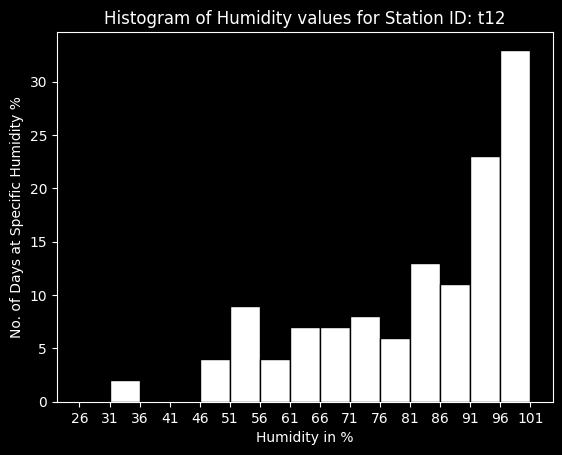

In [15]:
import matplotlib.pyplot as plt

bins = np.arange(min(humidity)-5, max(humidity)+5, 5)

plt.style.use('dark_background')
plt.hist(humidity, bins=bins,edgecolor='black', color = 'white')
plt.xticks(bins)
plt.title("Histogram of Humidity values for Station ID: t12")
plt.xlabel("Humidity in %")
plt.ylabel("No. of Days at Specific Humidity %")
plt.show()

# II

## Question 1

In [16]:
landslide_miss = pd.read_csv('landslide_data_miss.csv')

In [48]:
landslide_miss

,dates,stationid,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
0,08-07-2018,t10,25.46875,82.18750,1036.346875,6.75,5.5000,4000.0,0.0000
1,09-07-2018,t10,26.19298,83.14912,1037.604386,1761.75,11.8448,4000.0,5.6930
2,10-07-2018,t10,25.17021,85.34043,1037.889362,652.50,8.7692,4000.0,NaN
3,11-07-2018,t10,NaN,87.68657,1036.857463,963.00,8.8358,4000.0,6.0373
4,12-07-2018,t10,24.06923,87.64615,1027.830769,254.25,274.6232,4333.0,31.2385
...,...,...,...,...,...,...,...,...,...
940,21-11-2018,t9,NaN,58.69630,1026.797407,73577.25,5521.1231,47460.0,54.4222
941,22-11-2018,t9,15.52482,63.16312,1027.495248,65301.75,5521.1231,47460.0,54.5674
942,23-11-2018,t9,15.81560,59.21277,1029.318511,73534.50,5521.1231,47460.0,54.8794
943,24-11-2018,t9,16.58571,54.63571,1026.776357,72283.50,5521.1231,47460.0,55.0286


In [17]:
landslide_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dates        945 non-null    object 
 1   stationid    926 non-null    object 
 2   temperature  879 non-null    float64
 3   humidity     900 non-null    float64
 4   pressure     868 non-null    float64
 5   rain         907 non-null    float64
 6   lightavg     898 non-null    float64
 7   lightmax     914 non-null    float64
 8   moisture     914 non-null    float64
dtypes: float64(7), object(2)
memory usage: 66.6+ KB


In [18]:
landslide_cleaned = landslide_miss.dropna(subset=['stationid'])

In [19]:
no_of_Attr = landslide_cleaned.shape[1]
landslide_cleaned.dropna(thresh=(no_of_Attr/3)*2)
#threshold =  min number of non-NA values to keep

,dates,stationid,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
0,08-07-2018,t10,25.46875,82.18750,1036.346875,6.75,5.5000,4000.0,0.0000
1,09-07-2018,t10,26.19298,83.14912,1037.604386,1761.75,11.8448,4000.0,5.6930
2,10-07-2018,t10,25.17021,85.34043,1037.889362,652.50,8.7692,4000.0,NaN
3,11-07-2018,t10,NaN,87.68657,1036.857463,963.00,8.8358,4000.0,6.0373
4,12-07-2018,t10,24.06923,87.64615,1027.830769,254.25,274.6232,4333.0,31.2385
...,...,...,...,...,...,...,...,...,...
940,21-11-2018,t9,NaN,58.69630,1026.797407,73577.25,5521.1231,47460.0,54.4222
941,22-11-2018,t9,15.52482,63.16312,1027.495248,65301.75,5521.1231,47460.0,54.5674
942,23-11-2018,t9,15.81560,59.21277,1029.318511,73534.50,5521.1231,47460.0,54.8794
943,24-11-2018,t9,16.58571,54.63571,1026.776357,72283.50,5521.1231,47460.0,55.0286


## Question 2

In [20]:
landslide_miss[landslide_miss.isna()]

,dates,stationid,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
ls_cleaned = pd.read_csv("landslide_data_miss.csv")

def interpolate(ser:pd.Series):
    copy_ser = ser.copy()
    null_indices = copy_ser.index[copy_ser.isna()]
    # print(null_indices)

    for ind in null_indices:
        if ind == 0 or ind == len(copy_ser)-1:
            return
        
        lower = ind-1
        upper = ind+1
        while upper<len(copy_ser)-1 and pd.isna(copy_ser[upper]):
            upper+=1
        
        while lower>0 and pd.isna(copy_ser[lower]):
            lower-=1

        if lower>=0 and upper<=len(copy_ser)-1:
            copy_ser.loc[ind] = ((copy_ser[lower]) *(upper-ind) + (copy_ser[upper])*(ind-lower))/(upper-lower)

    return copy_ser

In [22]:
ls_cleaned['temperature'].head()

0    25.46875
1    26.19298
2    25.17021
3         NaN
4    24.06923
Name: temperature, dtype: float64

In [23]:
for i in ls_cleaned.columns[2:]:
    ls_cleaned[i] = interpolate(ls_cleaned[i])

# interpolate(ls_cleaned['temperature']) #type:ignore

In [24]:
ls_cleaned.to_csv("ls_clean_intp.csv", index=False)

In [25]:
ls_cleaned.columns[2:]

Index(['temperature', 'humidity', 'pressure', 'rain', 'lightavg', 'lightmax',
       'moisture'],
      dtype='object')

In [26]:
from I_1 import Statistic

In [27]:
mean_dict = dict({
    "Interploated" : [Statistic("ls_clean_intp.csv", i).mean_() for i in ls_cleaned.columns[2:]],
    "Original" : [Statistic("landslide_data_original.csv", i).mean_() for i in ls_cleaned.columns[2:]]
})

median_dict = dict({
    "Interploated" : [Statistic("ls_clean_intp.csv", i).med_() for i in ls_cleaned.columns[2:]],
    "Original" : [Statistic("landslide_data_original.csv", i).med_() for i in ls_cleaned.columns[2:]]
})

std_dict = dict({
    "Interploated" : [Statistic("ls_clean_intp.csv", i).std_() for i in ls_cleaned.columns[2:]],
    "Original" : [Statistic("landslide_data_original.csv", i).std_() for i in ls_cleaned.columns[2:]]
})


pd.DataFrame(mean_dict)

,Interploated,Original
0,21.196222,21.214888
1,83.538245,83.479932
2,1009.264758,1009.008774
3,10651.638370,10701.538370
4,4486.340772,4438.428453
5,21517.191005,21788.623280
6,32.327431,32.386053


In [28]:
pd.DataFrame(median_dict)

,Interploated,Original
0,22.169210,22.272730
1,91.380950,91.380950
2,1014.677832,1014.677832
3,22.500000,18.000000
4,1623.494100,1656.880000
5,6569.000000,6634.000000
6,16.306600,16.704200


In [29]:
pd.DataFrame(std_dict)

,Interploated,Original
0,4.327213,4.353513
1,18.197091,18.200427
2,45.974447,46.955613
3,24766.397759,24839.102466
4,7569.787064,7569.154781
5,21923.556762,22053.315399
6,33.584782,33.635434


In [30]:
ls_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dates        945 non-null    object 
 1   stationid    926 non-null    object 
 2   temperature  945 non-null    float64
 3   humidity     945 non-null    float64
 4   pressure     945 non-null    float64
 5   rain         945 non-null    float64
 6   lightavg     945 non-null    float64
 7   lightmax     945 non-null    float64
 8   moisture     945 non-null    float64
dtypes: float64(7), object(2)
memory usage: 66.6+ KB


## Question 2

In [31]:
def RSME(ser1, ser2):
    rmse = (sum((ser1-ser2)**2) / (len(ser1)))**0.5
    return rmse        

In [32]:
rmse_vals = []

for i in ls_cleaned.columns[2:]:
    rmse_vals.append(RSME(ls_cleaned[i], landslide[i]))

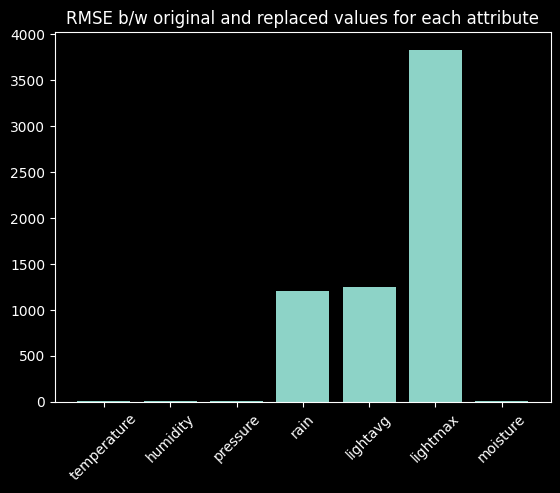

In [33]:
plt.bar(ls_cleaned.columns[2:], rmse_vals)
plt.title("RMSE b/w original and replaced values for each attribute")
# plt.ylim(0,100)
plt.xticks(rotation=45)
plt.show()

# III

## Question 1

In [34]:
Q1 = ls_cleaned.iloc(axis=1)[2:].quantile(0.25)
Q3 = ls_cleaned.iloc(axis=1)[2:].quantile(0.75)

outliers_df = ls_cleaned[(ls_cleaned.iloc(axis=1)[2:] <= Q1 - 1.5*(Q3-Q1)) | (ls_cleaned.iloc(axis=1)[2:] >= Q3 + 1.5*(Q3-Q1))]
# outliers_df['rain'].dropna()


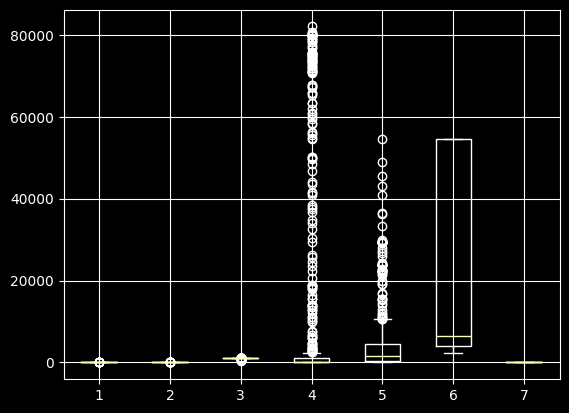

In [35]:
plt.boxplot(ls_cleaned.iloc(axis=1)[2:], vert=True)
plt.grid()
plt.show()

## Question 2

In [36]:
# def median_forthis(df:pd.DataFrame):
#     copydf = df
#     for i in copydf.columns[2:]:
#         med = Statistic("ls_clean_intp.csv", i).med_()
#         mycol = ls_cleaned[outliers_df.isna()][i].fillna(med)
#         copydf[i] = mycol
#     return copydf

new_without_outliers = ls_cleaned[outliers_df.isna()].fillna(ls_cleaned.iloc(axis=1)[2:].median()) # ---> replace it with non-built-in function of median
# new_without_outliers = median_forthis(ls_cleaned)
new_without_outliers

,dates,stationid,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
0,08-07-2018,t10,25.46875,82.18750,1036.346875,6.75,5.5000,4000.0,0.00000
1,09-07-2018,t10,26.19298,83.14912,1037.604386,1761.75,11.8448,4000.0,5.69300
2,10-07-2018,t10,25.17021,85.34043,1014.677832,652.50,8.7692,4000.0,5.86515
3,11-07-2018,t10,24.61972,87.68657,1036.857463,963.00,8.8358,4000.0,6.03730
4,12-07-2018,t10,24.06923,87.64615,1027.830769,254.25,274.6232,4333.0,31.23850
...,...,...,...,...,...,...,...,...,...
940,21-11-2018,t9,13.80851,58.69630,1026.797407,22.50,5521.1231,47460.0,54.42220
941,22-11-2018,t9,15.52482,63.16312,1027.495248,22.50,5521.1231,47460.0,54.56740
942,23-11-2018,t9,15.81560,59.21277,1029.318511,22.50,5521.1231,47460.0,54.87940
943,24-11-2018,t9,16.58571,54.63571,1026.776357,22.50,5521.1231,47460.0,55.02860


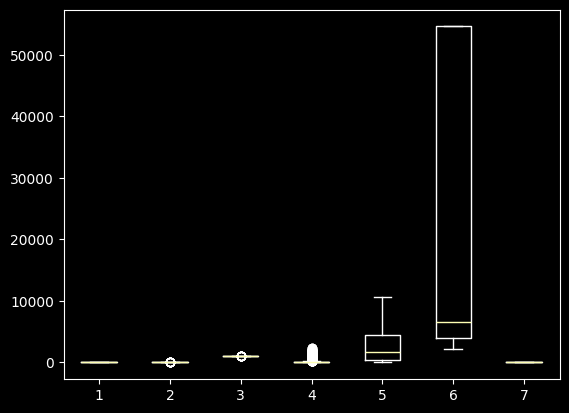

In [37]:
plt.boxplot(new_without_outliers.iloc(axis=1)[2:], vert=True)
# plt.grid()
plt.show()

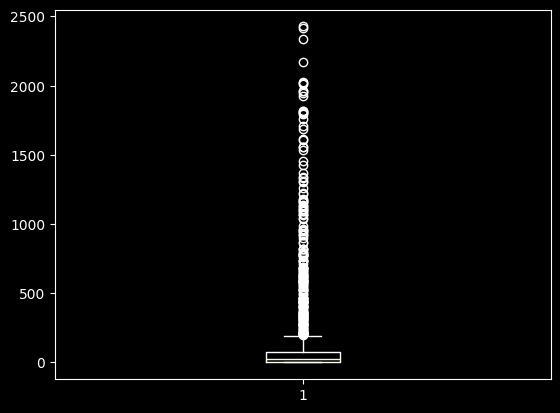

In [38]:
plt.boxplot(new_without_outliers['rain'])
plt.show()

In [39]:
new_without_outliers.to_csv("without_outliers.csv", index=False)

# IV

## Question 1

In [40]:
new_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dates        945 non-null    object 
 1   stationid    926 non-null    object 
 2   temperature  945 non-null    float64
 3   humidity     945 non-null    float64
 4   pressure     945 non-null    float64
 5   rain         945 non-null    float64
 6   lightavg     945 non-null    float64
 7   lightmax     945 non-null    float64
 8   moisture     945 non-null    float64
dtypes: float64(7), object(2)
memory usage: 66.6+ KB


In [41]:
def min_max_norm(df:pd.DataFrame):
    copy_df = df.iloc[:,2:].copy()
    cols = copy_df.columns
    # print(cols)
    for i in cols:
        my_min= min(copy_df[i])
        my_max= max(copy_df[i])

        copy_df[i] = ((copy_df[i]-my_min)/(my_max-my_min)) * (7) + 5
    
    df.iloc(axis=1)[2:] = copy_df
    return df

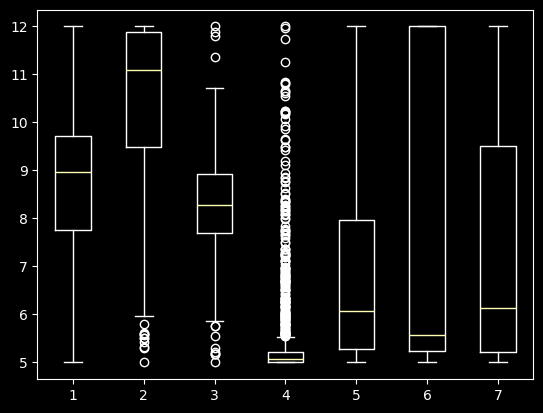

In [42]:
removed_outl_df = new_without_outliers.copy()
removed_outl_df = min_max_norm(removed_outl_df)
plt.boxplot(removed_outl_df.iloc[:, 2:])
plt.show()

In [43]:
removed_outl_df.describe()

,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,8.703710,10.451358,8.311845,5.490753,6.487186,7.574969,7.262920
std,1.347407,1.703281,0.987669,1.114073,1.472216,2.932901,2.352180
min,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,7.760941,9.497506,7.691272,5.000000,5.276306,5.232785,5.209510
50%,8.973186,11.091838,8.285242,5.064875,6.075635,5.576280,6.141462
75%,9.712139,11.878640,8.935569,5.220575,7.974096,12.000000,9.517499
max,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000


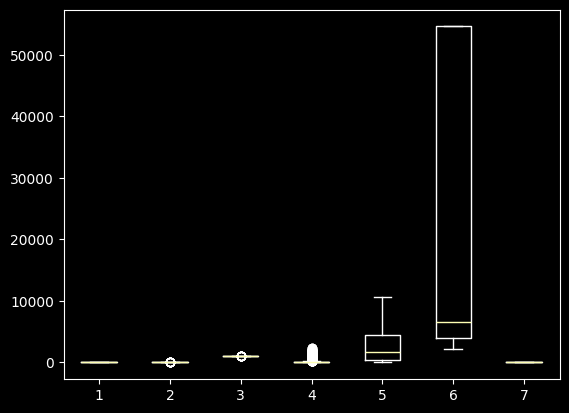

In [44]:
plt.boxplot(new_without_outliers.iloc[:, 2:])
plt.show()

## Question 2

In [45]:
last_df = new_without_outliers.copy()

last_df.describe()

,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,21.349623,85.499855,1014.842018,170.203582,2244.662718,21517.191005,32.327431
std,4.098022,15.640098,6.095648,386.384444,2222.068836,21935.165741,33.602566
min,10.085110,35.443660,994.402143,0.000000,0.000000,2259.000000,0.000000
25%,18.482270,76.741260,1011.012000,0.000000,417.039200,4000.000000,2.993000
50%,22.169210,91.380950,1014.677832,22.500000,1623.494100,6569.000000,16.306600
75%,24.416670,98.605635,1018.691489,76.500000,4488.910300,54612.000000,64.535700
max,31.375000,99.720000,1037.604386,2427.750000,10565.352300,54612.000000,100.000000


In [46]:
for i in last_df.columns[2:]:
    last_df[i] = (last_df[i] - np.mean(last_df[i]))/np.std(last_df[i])

In [47]:
last_df.describe()

,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
count,9.450000e+02,9.450000e+02,9.450000e+02,9.450000e+02,9.450000e+02,9.450000e+02,9.450000e+02
mean,2.180502e-16,-2.782019e-16,3.218119e-15,1.127846e-17,2.255691e-17,-1.353415e-16,-3.007588e-17
std,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00,1.000530e+00
min,-2.750223e+00,-3.202199e+00,-3.354967e+00,-4.407365e-01,-1.010703e+00,-8.784246e-01,-9.625619e-01
25%,-7.000623e-01,-5.603055e-01,-6.286529e-01,-4.407365e-01,-8.229229e-01,-7.990123e-01,-8.734442e-01
50%,2.001017e-01,3.762259e-01,-2.694929e-02,-3.824735e-01,-2.796932e-01,-6.818324e-01,-4.770265e-01
75%,7.488177e-01,8.384040e-01,6.318457e-01,-2.426423e-01,1.010516e+00,1.509555e+00,9.590138e-01
max,2.447689e+00,9.096922e-01,3.736177e+00,5.845841e+00,3.746552e+00,1.509555e+00,2.014977e+00
